<h1 align='center'>EE2703 Applied Programming Lab</h1>
<h2 align='center'>Assignment 3</h2>
<h3 align='center'>Feb 22, 2018</h3>
<h3 align='center'>Rajat Vadiraj Dwaraknath EE16B033</h3>

# Introduction
In this assignment, an analysis of fourier series approximations on two functions is done, namely $e^x$ and $\cos(\cos(x))$. The basic idea of fourier series is that certain well behaved functions can be represented as an infinte series of scaled harmonics. The coefficients which are used to scale each harmonic are found using the integration formulas given in the assignment text. The fourier coefficients for the above two functions are estimated by numerically evaluating these integrals. Another approach for estimating the fourier coefficients is also done, namely least squares estimation. The results of the two approaches are compared. The differences in convergence between the two test functions are also noted.


# Part 1
Numpy and matplotlib are imported inline using pylab. The plot size and font size are increased.

In [1]:
# Importing numpy and matplotlib
%pylab inline
from scipy.integrate import quad

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Increase figure and font size
rcParams['figure.figsize'] = 12,9
rcParams['font.size'] = 18
rcParams['text.usetex'] = True

In [3]:
def periodic(a, b):
    """
    Decorator to periodically extend a function 
    using the values in the interval (a,b).
    """
    interval = b - a
    return lambda f: lambda x: f((x - a) % interval + a)

The periodic extensions of the two functions over an interval $[0,2\pi]$ are created below:

In [4]:
@periodic(0,2*pi)
def coscos(x):
    return cos(cos(x))

@periodic(0,2*pi)
def per_e(x):
    return exp(x)

In [5]:
x = linspace(-2*pi,4*pi,400)
coscos(arange(10)) # Works with numpy arrays

array([ 0.54030231,  0.85755322,  0.91465333,  0.54869613,  0.79387345,
        0.96003693,  0.57338048,  0.72902338,  0.98943353,  0.61285301])

The functions and their periodic versions are plotted below. The fourier series will yield the periodic version of the function as its result.

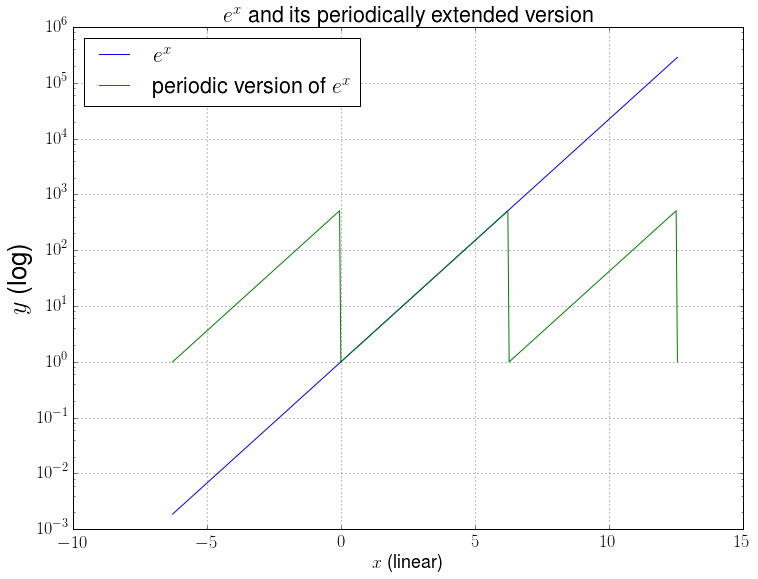

In [6]:
fig1 = figure()
ax = fig1.add_subplot(1,1,1)
ax.set_yscale('log')
grid(True)
plot(x,exp(x))
plot(x,per_e(x))
title("$e^x$ and its periodically extended version")
ylabel(r"$y$ (log)", fontsize = 26)
xlabel(r"$x$ (linear)")
legend([r"$e^x$",r"periodic version of $e^x$"], loc=0)
show()

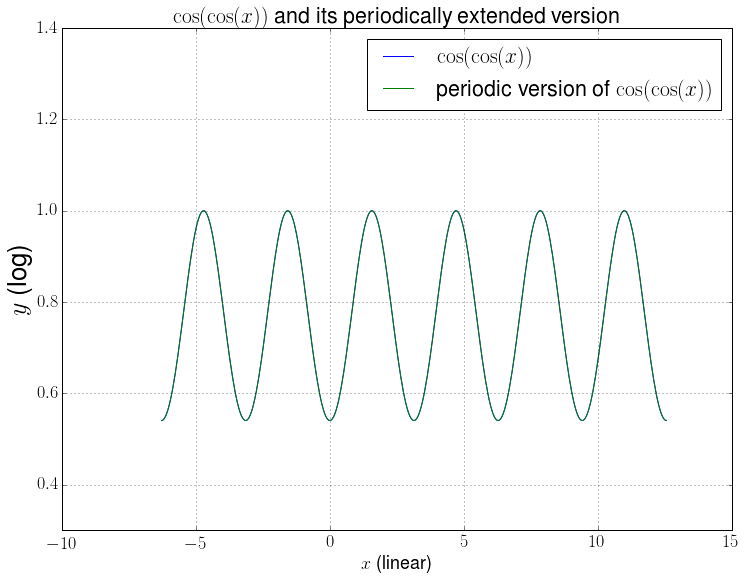

In [7]:
fig2 = figure()
grid(True)
plot(x,cos(cos(x)))
plot(x,coscos(x))
title("$\cos(\cos(x))$ and its periodically extended version")
ylabel(r"$y$ (log)", fontsize = 26)
xlabel(r"$x$ (linear)")
legend([r"$\cos(\cos(x))$",r"periodic version of $\cos(\cos(x))$"], loc=1)
ylim(0.3,1.4)
show()

Clearly, we observe that $\cos(\cos(x))$ is periodic while $e^x$ is not.

# Part 2
A function to find the $n$ odd and even fourier coefficients is written below. It estimates the coefficients by numerically evaluating the integrals using the *quad* function.

In [8]:
def quad_fourier(f,n):
    """
    Find the n even and odd fourier coefficients of f, and the DC
    value, using quad integration.
    Assumes a period from 0 to 2pi.
    """
    
    # functions to integrate
    u = lambda x,k : f(x)*cos(k*x)
    v = lambda x,k : f(x)*sin(k*x)
    
    # DC coefficient
    a0 = 1/(2*pi)*quad(f,0,2*pi)[0]
    
    # find coefficients by integrating
    ret = [a0]
    for k in arange(n)+1:
        ak = 1/pi*quad(u,0,2*pi,args=(k))[0]
        bk = 1/pi*quad(v,0,2*pi,args=(k))[0]
        ret.append(ak)
        ret.append(bk)
        
    return array(ret)

The first $51$ coefficients for the two periodic functions are found below:

In [9]:
ef = quad_fourier(per_e,25)
cf = quad_fourier(coscos,25)

# Part 3
The coefficients are plotted on a semilog and log-log scale below.

In [10]:
def plotCoeffs(coeffs, name="Coefficients"):
    """
    Helper function to scatter the given coefficients on a 
    semilog and loglog scale
    """
    
    fig0 = figure()
    ax = fig0.add_subplot(1,1,1)
    ax.set_yscale('log')
    grid(True)
    title("Fourier coefficients of {} (semilog)".format(name))
    ylabel(r"Magnitude of coefficients", fontsize = 26)
    xlabel(r"Index")
    scatter(arange(len(coeffs))+1,abs(coeffs),color='red',s=50)
    show()
    
    fig1 = figure()
    ax = fig1.add_subplot(1,1,1)
    ax.set_yscale('log')
    ax.set_xscale('log')
    grid(True)
    title("Fourier coefficients of {} (log-log)".format(name))
    ylabel(r"Magnitude of coefficients", fontsize = 26)
    xlabel(r"Index")
    scatter(arange(len(coeffs))+1,abs(coeffs),color='red',s=50)
    
    return fig0,fig1

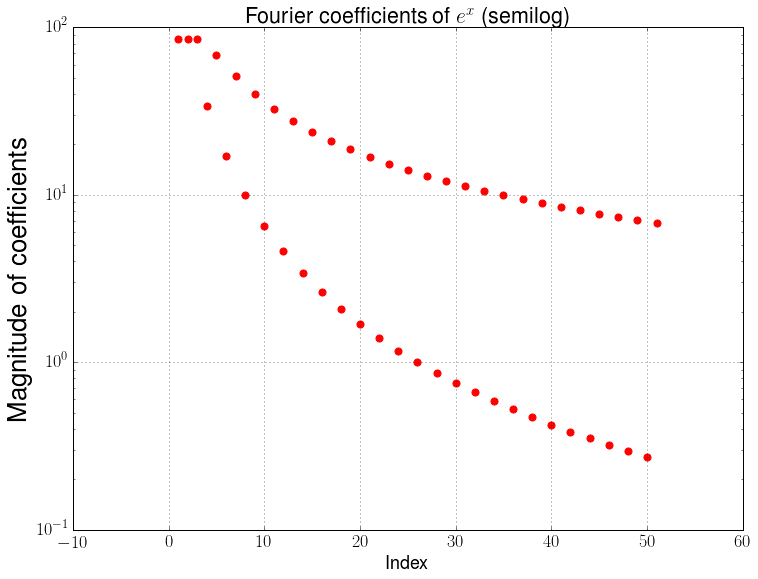

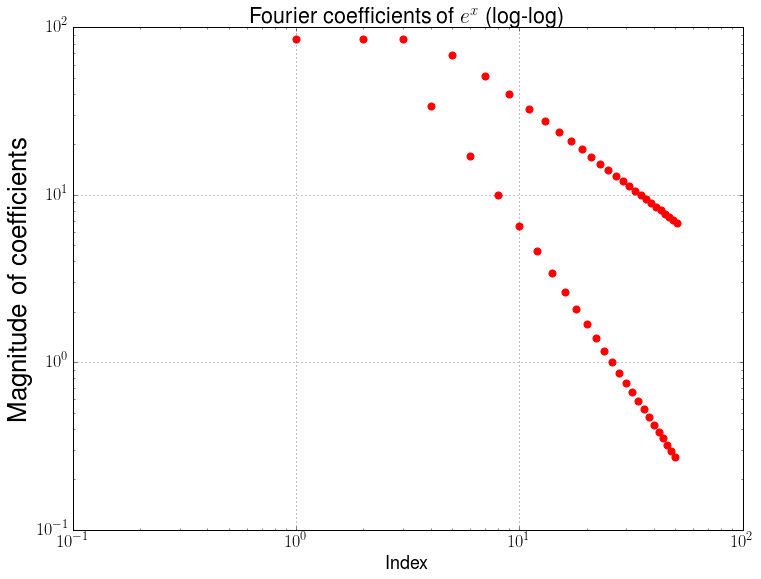

In [11]:
fig3,fig4 = plotCoeffs(ef,r"$e^x$")

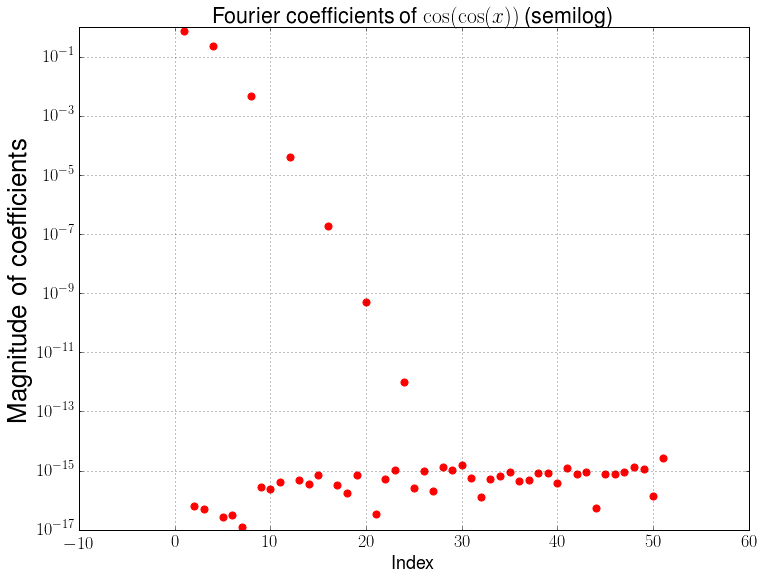

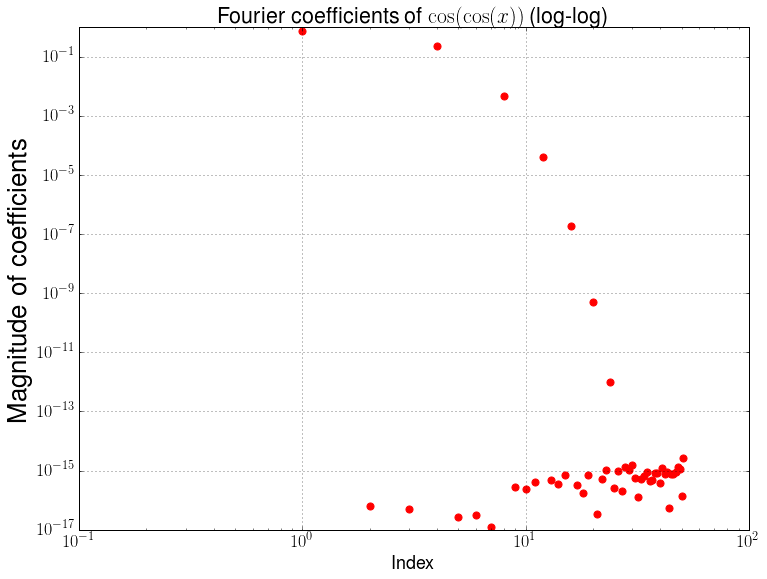

In [12]:
fig5,fig6 = plotCoeffs(cf,"$\cos(\cos(x))$")

## Question (a)
The $b_n$ coefficients correspond to the coefficients for the $sin(kx)$ harmonics, which are odd functions. Since $\cos(\cos(x))$ is an even function, it does not contain any odd harmonics. So, the $b_n$ coefficients are very nearly zero in Fig 3 and 4.

## Question (b)
The magnitude of the fourier coefficients corresponds to the amount of a particular frequency which is present in the function. Heuristically, we can observe that $\cos(\cos(x))$ is a function which contains not many different frequencies of harmonics, so one may expect that high frequency harmonics will not contribute to the fourier series much. On the other hand, it is not evident or obvious what the frequency components of $e^x$ are. The reason for the slow decay of the coefficients of $e^x$ is the presence of a discontinuity in its periodic extension. Clearly, the discontinuity occurs at all $x = 2k\pi$ where $k$ is any integer. To accurately represent discontiuities using a series of continuous harmonic functions requires non-uniform convergence. In other words, the discontinuity represents a "high frequency" component in the function. So, the coefficients do not decay as fast. 

## Question (c)
The *loglog* plot looks linear for the first case because the fourier coefficients of $e^x$ decay as a power of $n$, in particular, $a_n$ decays as $\frac{1}{n}$ and $b_n$ decays as $\frac{1}{n^2}$. The magnitude of the complex fourier coefficients of $e^x$ therefore decays as $\frac{1}{n}$. This is because of the discontinuities in the periodic extension of $e^x$. The *semilog* plot looks linear for the second case because the fourier coefficients of $\cos(\cos(x))$ decay exponentially with $n$.

# Part 4
The fourier coefficients are now estimated using a different approach than numerical integration - least squares estimation. A function to do the same is written below:

In [13]:
def lstsq_fourier(f,n,steps=400):
    """
    Find the n even and odd fourier coefficients of f, and the DC
    value, using least squares estimation. Defaults to 400 steps.
    Assumes a period from 0 to 2pi.
    
    Also returns the least squares matrix
    """
    
    x=linspace(0,2*pi,steps+1)
    x=x[:-1] # drop last term to have a proper periodic integral
    b=f(x) # f has been written to take a vector
    A=zeros((steps,2*n+1)) # allocate space for A
    A[:,0]=1 # col 1 is all ones
    for k in range(1,n+1):
        A[:,2*k-1]=cos(k*x) # cos(kx) column
        A[:,2*k]=sin(k*x) # sin(kx) column
    
    return lstsq(A,b)[0], A

# Part 5
The coefficients obtained using this method are plotted on the same figures below:

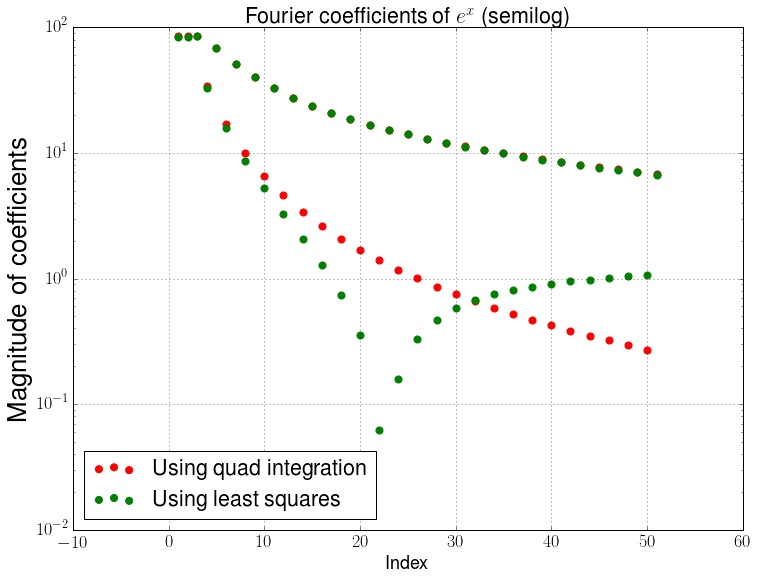

In [14]:
s = 400 # number of steps for least square estimation
elc, Aexp = lstsq_fourier(per_e,25,s)
ax = fig3.axes[0]
ax.scatter(arange(len(elc))+1,abs(elc),s=50,color='green')
ax.legend(["Using quad integration", "Using least squares"], loc=3)
fig3

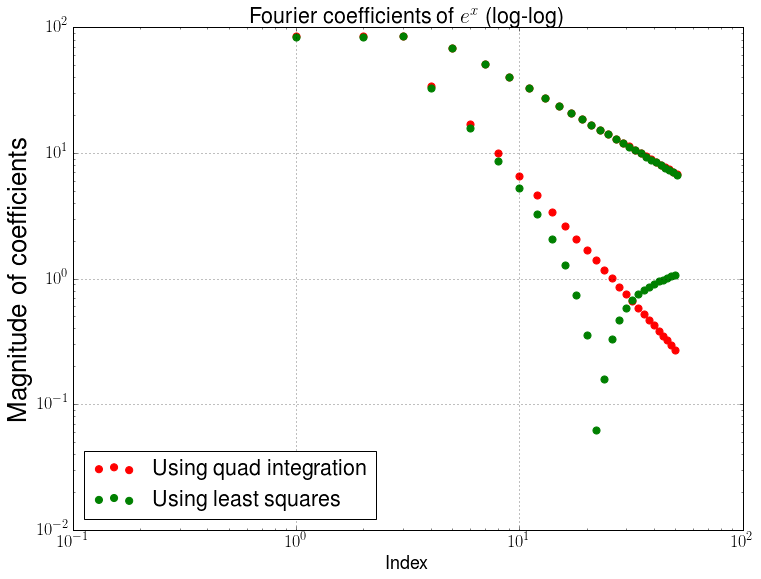

In [15]:
ax = fig4.axes[0]
ax.scatter(arange(len(elc))+1,abs(elc),color='green',s=50)
ax.legend(["Using quad integration", "Using least squares"],loc=3)
fig4

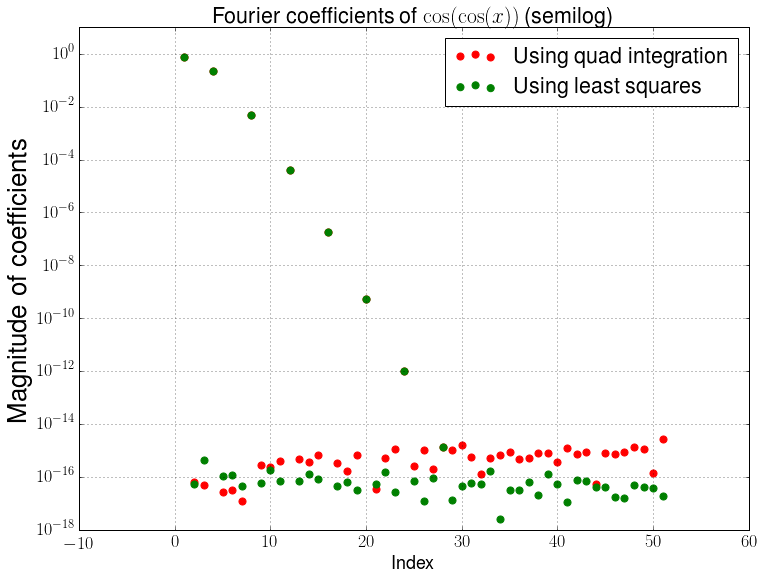

In [16]:
clc, Acos = lstsq_fourier(coscos,25,s)
ax = fig5.axes[0]
ax.scatter(arange(len(clc))+1,abs(clc),color='green',s=50)
ax.legend(["Using quad integration", "Using least squares"],loc=1)
fig5

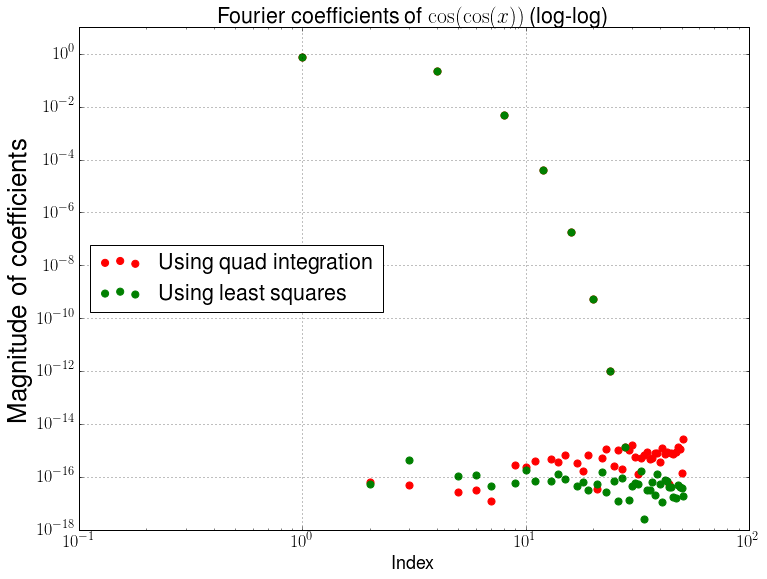

In [17]:
ax = fig6.axes[0]
ax.scatter(arange(len(clc))+1,abs(clc),color='green',s=50)
ax.legend(["Using quad integration", "Using least squares"],loc=6)
fig6

# Part 6
From the above plots we observe that the coefficients more or less agree for the second case, namely $\cos(\cos(x))$, but disagree significantly in the first case, namely $e^x$. This is to be expected because the numerical integration method acquires more information about the function than merely the value at just $400$ points, like the least squares estimation does. Since $e^x$ contains more frequency components, more samples of the function are required to accurately estimate its fourier coefficients. The deviations are obtained below:

In [18]:
print(max(abs(ef-elc))) # largest deviation in coefficients of e^x

1.33273087034


In [19]:
print(max(abs(cf-clc))) # largest deviation in coefficients of cos(cos(x))

2.57586713575e-15


To obtain better results for $e^x$, one can perform the least squares technique using more than just $400$ points. We compare the coefficients obtained using $10^5$ steps with the previous results below:

In [20]:
el_better, Aexp_better = lstsq_fourier(per_e,25,int(1e5))

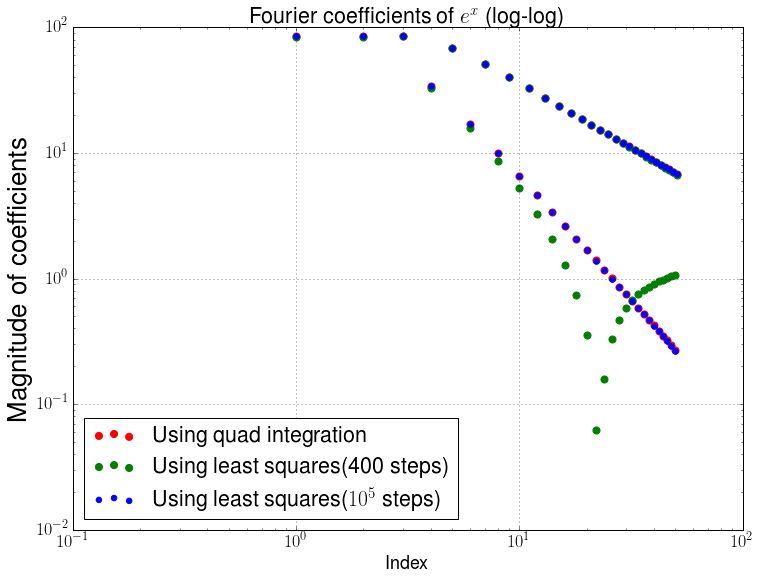

In [21]:
ax = fig4.axes[0]
ax.scatter(arange(len(el_better))+1,abs(el_better),color='blue',s=30)
ax.legend(["Using quad integration", 
           "Using least squares(400 steps)",r"Using least squares($10^5$ steps)"]
          ,loc=3)
fig4

We observe that the coefficients are now in much more agreement. This can be seen by calculating the maximum devation again:

In [22]:
# largest deviation in coefficients of e^x using 1e5 steps
print(max(abs(ef-el_better))) 

0.00534486058358


The above behaviour can be explained by comparing how the fourier coefficients are computed by quad and least squares. Both methods attempt to solve the matrix problem 

$$Ac=b$$

Where $A$ is the matrix of sampled harmonics, $c$ is the vector of coefficients and $b$ is the vector of sampled function values.   

When the coefficients are computed using the integration formulas, what essentially occurs is that the matrix $A$ is assumed to be orthogonal. This means that $A^T A$ is a diagonal matrix, and with appropriate normalization, is the identity matrix. This means that the matrix equation can be turned into:

$$A^T A c = A^T b$$
$$c = K A^T b$$

The vector obtained by computing $A^T b$ after normalization with the constant $K$ is the vector of coefficients. If we observe carefully, this dot product is analogous to performing trapezoidal integration in accordance with the integration formulas for the fourier coefficients. The quad function performs a more accurate version of the integration by using interpolation, but the essence of the procedure remains the same. 

The least squares approach computes the coefficients without presuming anything about the matrix $A$. It finds $c$ as follows:

$$c = (A^T A)^{-1} A^T b$$

Since the matrix $A$ becomes more orthogonal as the number of samples of the harmonics increases, we can conclude that the two results converge to the same coefficients as the number of samples increases.  

The deviation in the coefficients of $e^x$ which we observed with $400$ points can be explained by noticing that $e^x$ has more high frequency components than $\cos(\cos(x))$, which means that the fact that $A$ is not exactly orthogonal will have a greater affect. Also, the quad function does not take the number of samples as an argument, which means that we cannot be sure that the two methods are on an equal footing when taking $400$ samples for least squares.

# Part 7
The function values are estimated using the evaluated fourier coefficients below:

In [23]:
I = linspace(0,2*pi,s) # x values for the evaluated function values

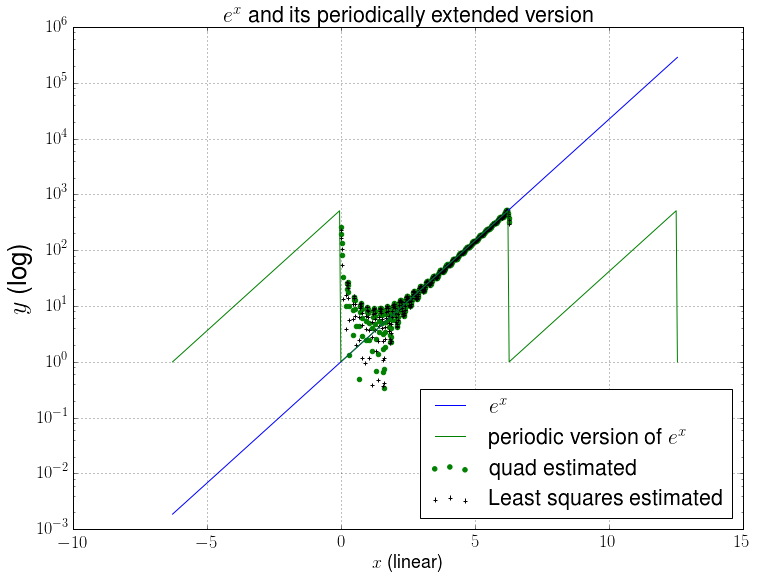

In [24]:
ax = fig1.axes[0]
ax.scatter(I,dot(Aexp,ef),color = 'green')
ax.scatter(I,dot(Aexp,elc),color = 'black',marker='+')
ax.set_ylim(1e-3,1e6)
ax.legend([r"$e^x$",r"periodic version of $e^x$",
           "quad estimated","Least squares estimated"], loc = 4)
fig1

We can gain more insight by plotting the estimate as a line plot on a linear scale.

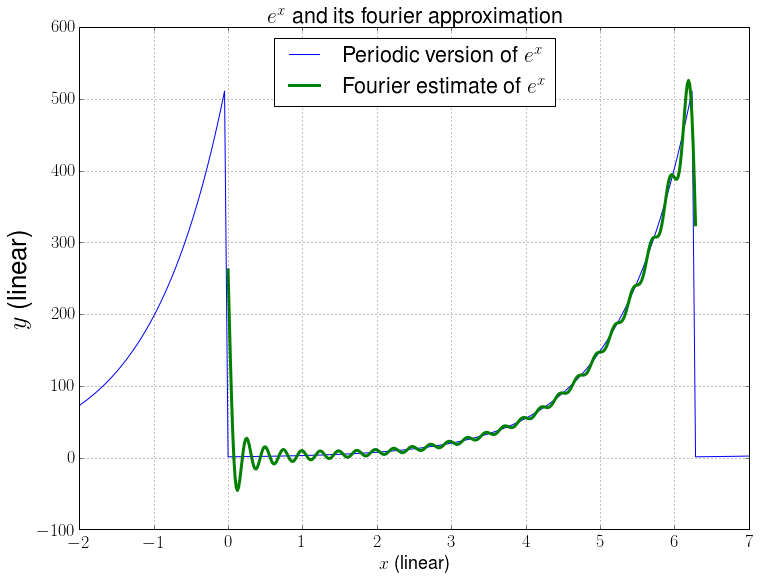

In [25]:
figure()
grid(True)
xlim(-2,7)
plot(x,per_e(x))
plot(I,dot(Aexp,ef),linewidth=3)
title("$e^x$ and its fourier approximation")
ylabel(r"$y$ (linear)", fontsize = 26)
xlabel(r"$x$ (linear)")
legend([r"Periodic version of $e^x$",r"Fourier estimate of $e^x$"], loc=0)
show()

The above graph makes the **Gibb's phenomenon** apparent.

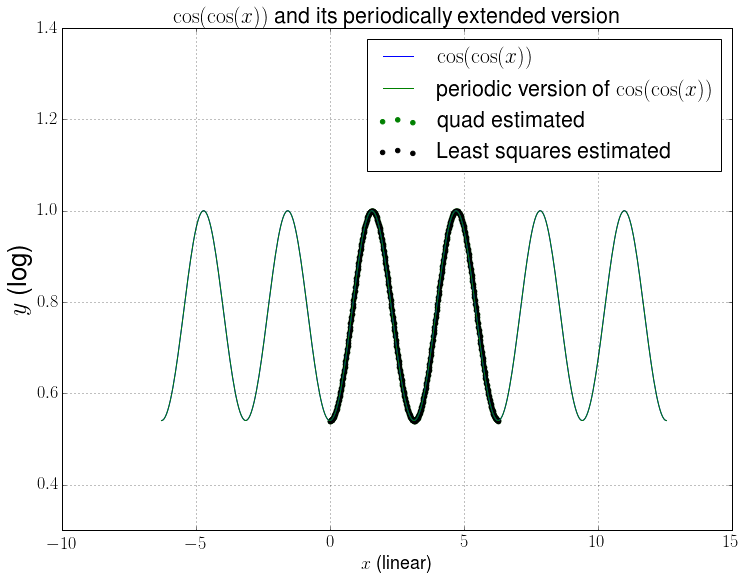

In [26]:
ax = fig2.axes[0]
ax.scatter(I,dot(Acos,cf),color = 'green')
ax.scatter(I,dot(Acos,clc),color = 'black')
ax.legend([r"$\cos(\cos(x))$",r"periodic version of $\cos(\cos(x))$"
           ,"quad estimated","Least squares estimated"], loc = 0)
fig2

# Conclusions
We observe that the fourier estimation of $e^x$ disagrees significantly with the function close to $0$, but agrees almost perfectly in the case of $\cos(\cos(x))$. This is caused by the presence of a discontiuity at $x=0$ for the periodic extension of $e^x$. This discontiuity leads to non uniform convergence of the fourier series, which means that the partial sums obtained using the fourier coefficients converge at different rates for different values of $x$. Let us define the partial fourier summation $S_n(x)$ of $f(x)$ as the sum of the first $n$ odd and even fourier components. Then, non uniform convergence means that, given a $\delta > 0$, one cannot find a single $N \in \mathbb{N}$ for which 

$$ \| S_n(x) - f(x) \| <  \delta$$

If $n>N$ for all $x$ in the interval of convergence.  
This difference in the rates of convergence leads to the **Gibb's phenomenon**, which is the ringing observed at discontiuities in the fourier estimation of a discontiuous function. This ringing is present for any large $N$, but the series still converges as $N \to \infty$. This explains the mismatch in the fourier approximation for $e^x$.